# Práctica 2 - Alberto Roig

In [1235]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

### Carga de los datos

In [1236]:
dataTr = pd.read_csv("dataset_marketing_train.csv")
dataTe = pd.read_csv("dataset_marketing_test.csv")
display(dataTr)
display(dataTe)

,edad,empleo,estado,educacion,impago,hipoteca,prestamo,tipo_contacto,mes,dia_semana,contactos_actual,contactos_anterior,resultado_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target
0,26,management,single,university.degree,no,no,no,telephone,jun,mon,3,0,nonexistent,1.4,4.865,94.465,no
1,42,technician,married,professional.course,unknown,no,no,telephone,jun,mon,9,0,nonexistent,1.4,4.865,94.465,no
2,30,admin.,married,university.degree,no,no,no,telephone,jun,mon,2,0,nonexistent,1.4,4.865,94.465,no
3,55,technician,married,basic.9y,no,no,no,telephone,jun,mon,3,0,nonexistent,1.4,4.865,94.465,no
4,41,blue-collar,married,basic.4y,no,yes,no,telephone,jun,mon,2,0,nonexistent,1.4,4.865,94.465,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32647,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,1.028,94.767,yes
32648,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,1.028,94.767,no
32649,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,1.028,94.767,no
32650,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,1.028,94.767,yes


,edad,empleo,estado,educacion,impago,hipoteca,prestamo,tipo_contacto,mes,dia_semana,contactos_actual,contactos_anterior,resultado_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,4.857,93.994,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8531,56,retired,married,university.degree,no,no,no,cellular,aug,tue,3,1,failure,-1.7,0.886,94.027,yes
8532,58,retired,divorced,basic.4y,no,no,no,telephone,aug,tue,1,0,nonexistent,-1.7,0.886,94.027,no
8533,34,blue-collar,married,basic.9y,no,yes,no,cellular,aug,tue,2,0,nonexistent,-1.7,0.886,94.027,no
8534,44,admin.,single,high.school,no,yes,no,telephone,aug,tue,1,0,nonexistent,-1.7,0.886,94.027,no


### Análisis de los datos

In [1237]:
#Información general de los datos
display(dataTr.info())
display(dataTe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32652 entries, 0 to 32651
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                32652 non-null  int64  
 1   empleo              32652 non-null  object 
 2   estado              32652 non-null  object 
 3   educacion           32652 non-null  object 
 4   impago              32652 non-null  object 
 5   hipoteca            32652 non-null  object 
 6   prestamo            32652 non-null  object 
 7   tipo_contacto       32652 non-null  object 
 8   mes                 32652 non-null  object 
 9   dia_semana          32652 non-null  object 
 10  contactos_actual    32652 non-null  int64  
 11  contactos_anterior  32652 non-null  int64  
 12  resultado_anterior  32652 non-null  object 
 13  tasa_var_empleo_3m  32652 non-null  float64
 14  euribor_3m          32652 non-null  float64
 15  ipc_1m              32652 non-null  float64
 16  targ

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                8536 non-null   int64  
 1   empleo              8536 non-null   object 
 2   estado              8536 non-null   object 
 3   educacion           8536 non-null   object 
 4   impago              8536 non-null   object 
 5   hipoteca            8536 non-null   object 
 6   prestamo            8536 non-null   object 
 7   tipo_contacto       8536 non-null   object 
 8   mes                 8536 non-null   object 
 9   dia_semana          8536 non-null   object 
 10  contactos_actual    8536 non-null   int64  
 11  contactos_anterior  8536 non-null   int64  
 12  resultado_anterior  8536 non-null   object 
 13  tasa_var_empleo_3m  8536 non-null   float64
 14  euribor_3m          8536 non-null   float64
 15  ipc_1m              8536 non-null   float64
 16  target

None

In [1238]:
#Mirar números nulos
dataTr.isnull().sum()
dataTe.isnull().sum()

edad                  0
empleo                0
estado                0
educacion             0
impago                0
hipoteca              0
prestamo              0
tipo_contacto         0
mes                   0
dia_semana            0
contactos_actual      0
contactos_anterior    0
resultado_anterior    0
tasa_var_empleo_3m    0
euribor_3m            0
ipc_1m                0
target                0
dtype: int64

In [1239]:
#Obtenemos las columnas con variables categoricas
categorical_columns_train=dataTr.select_dtypes(exclude=["int64","float64"]).columns
categorical_columns_test=dataTe.select_dtypes(exclude=["int64","float64"]).columns

In [1240]:
#Mostamos las columnas categóricas de los datasets de training y de test 
for index,data in list(enumerate([dataTr,dataTe])):
    msg = "data_train" if index==1 else "data_test"
    print(msg.upper())
    print('----------------')
    for i in categorical_columns_train:
        display(i.upper(),data[i].unique())

DATA_TEST
----------------


'EMPLEO'

array(['management', 'technician', 'admin.', 'blue-collar', 'housemaid',
       'services', 'unemployed', 'retired', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

'ESTADO'

array(['single', 'married', 'divorced', 'unknown'], dtype=object)

'EDUCACION'

array(['university.degree', 'professional.course', 'basic.9y', 'basic.4y',
       'high.school', 'unknown', 'basic.6y', 'illiterate'], dtype=object)

'IMPAGO'

array(['no', 'unknown', 'yes'], dtype=object)

'HIPOTECA'

array(['no', 'yes', 'unknown'], dtype=object)

'PRESTAMO'

array(['no', 'unknown', 'yes'], dtype=object)

'TIPO_CONTACTO'

array(['telephone', 'cellular'], dtype=object)

'MES'

array(['jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'may',
       'sep'], dtype=object)

'DIA_SEMANA'

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

'RESULTADO_ANTERIOR'

array(['nonexistent', 'failure', 'success'], dtype=object)

'TARGET'

array(['no', 'yes'], dtype=object)

DATA_TRAIN
----------------


'EMPLEO'

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

'ESTADO'

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

'EDUCACION'

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

'IMPAGO'

array(['no', 'unknown'], dtype=object)

'HIPOTECA'

array(['no', 'yes', 'unknown'], dtype=object)

'PRESTAMO'

array(['no', 'yes', 'unknown'], dtype=object)

'TIPO_CONTACTO'

array(['telephone', 'cellular'], dtype=object)

'MES'

array(['may', 'jun', 'jul', 'aug'], dtype=object)

'DIA_SEMANA'

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

'RESULTADO_ANTERIOR'

array(['nonexistent', 'failure', 'success'], dtype=object)

'TARGET'

array(['no', 'yes'], dtype=object)

Podemos comprobar que las variables categoricas son las mismas en ambos datasets

In [1241]:
#Encoder transforma las variables categoricas en variables numéricas
label_encoder=preprocessing.LabelEncoder() 
display(categorical_columns_train)
display(categorical_columns_test)

Index(['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo',
       'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior', 'target'],
      dtype='object')

Index(['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo',
       'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior', 'target'],
      dtype='object')

In [1242]:
#Hacemos un fit del encoder con los datos de uno de los datasets y este se aplica en los dos, para que los datos concuerden
data_train=dataTr.copy()
data_test=dataTe.copy()
for i in categorical_columns_train:
    label_encoder.fit(data_train[i])
    data_train[i]=label_encoder.transform(dataTr[i])
    data_test[i]=label_encoder.transform(dataTe[i])
    

display(data_train.info())
display(data_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32652 entries, 0 to 32651
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                32652 non-null  int64  
 1   empleo              32652 non-null  int64  
 2   estado              32652 non-null  int64  
 3   educacion           32652 non-null  int64  
 4   impago              32652 non-null  int64  
 5   hipoteca            32652 non-null  int64  
 6   prestamo            32652 non-null  int64  
 7   tipo_contacto       32652 non-null  int64  
 8   mes                 32652 non-null  int64  
 9   dia_semana          32652 non-null  int64  
 10  contactos_actual    32652 non-null  int64  
 11  contactos_anterior  32652 non-null  int64  
 12  resultado_anterior  32652 non-null  int64  
 13  tasa_var_empleo_3m  32652 non-null  float64
 14  euribor_3m          32652 non-null  float64
 15  ipc_1m              32652 non-null  float64
 16  targ

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536 entries, 0 to 8535
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                8536 non-null   int64  
 1   empleo              8536 non-null   int64  
 2   estado              8536 non-null   int64  
 3   educacion           8536 non-null   int64  
 4   impago              8536 non-null   int64  
 5   hipoteca            8536 non-null   int64  
 6   prestamo            8536 non-null   int64  
 7   tipo_contacto       8536 non-null   int64  
 8   mes                 8536 non-null   int64  
 9   dia_semana          8536 non-null   int64  
 10  contactos_actual    8536 non-null   int64  
 11  contactos_anterior  8536 non-null   int64  
 12  resultado_anterior  8536 non-null   int64  
 13  tasa_var_empleo_3m  8536 non-null   float64
 14  euribor_3m          8536 non-null   float64
 15  ipc_1m              8536 non-null   float64
 16  target

None

In [1243]:
data_train['target']

0        0
1        0
2        0
3        0
4        0
        ..
32647    1
32648    0
32649    0
32650    1
32651    0
Name: target, Length: 32652, dtype: int64

No se eliminan los datos duplicados dado que reducen la precisión del modelo

In [1244]:
display(data_train.duplicated().sum())
display(data_test.duplicated().sum())

1553

242

display(data_train.duplicated().sum())
display(data_test.duplicated().sum())
data_train=data_train.drop_duplicates()
data_test=data_test.drop_duplicates()


## 1. Calcular el ratio de conversión (porcentaje de clientes que contratan) de la campaña en el conjunto de entrenamiento

Para el cálculo del ratio de conversión bastará con la división del número personas que han contratado el servicion entre el total de usuario y multiplicar esto por 100

Trás pasar las variables categóricas a numéricas podemos comprobar en la columna target que el número 0 hace referencia a las personas que no han contratado el servicio y el 1 hace referencia a las personas que han contratado el servicio, por lo tanto, con sumar los número de la columna target ya obtendremos el número de personas que han contratado el servicio

In [1245]:
pd.read_csv("dataset_marketing_train.csv")['target'].value_counts()


no     28655
yes     3997
Name: target, dtype: int64

In [1246]:
data_train['target'].value_counts() # Comprobación de que se ha realizado la conversion del valor 'no' por 0

0    28655
1     3997
Name: target, dtype: int64

In [1247]:
print('El ratio de conversión es: '+f'{(data_train.target.sum()/data_train.shape[0])*100:.3f}'+'%')

El ratio de conversión es: 12.241%


## 2. ¿Cómo influye el día de la semana de contacto en el resultado de la campaña? ¿Y el mes?

## Según el día de la semana

In [1248]:
data_train['dia_semana'].corr(data_train['target'])

0.02051267596600076

dia_semana
fri    6035
mon    6980
thu    7146
tue    6199
wed    6292
Name: target, dtype: int64

Text(0.5, 1.0, 'Número de contrataciones según el día de la semana')

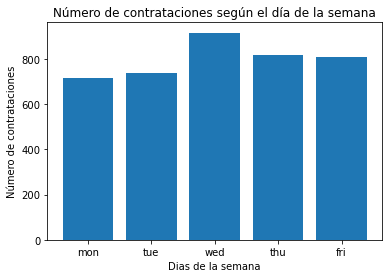

In [1249]:
display(dataTr.groupby('dia_semana')['target'].count())
plt.bar(dataTr.dia_semana.unique(),data_train.groupby('dia_semana')['target'].sum())
plt.xlabel('Dias de la semana')
plt.ylabel('Número de contrataciones')
plt.title('Número de contrataciones según el día de la semana')

Como podemos ver con el porcentaje de correlacion entre la columna target y el día de la semana y el gráfico que representa el número de contrataciones y el día de la semana no hay una correlación muy alta entre esta variable y la columna target

## Según el mes

In [1250]:
data_train['mes'].corr(data_train['target'])

0.06036267999010513

mes
apr    2632
aug    5945
dec     182
jul    6863
jun    5089
mar     546
may    6006
nov    4101
oct     718
sep     570
Name: target, dtype: int64

Text(0.5, 1.0, 'Número de contrataciones según el día de la semana')

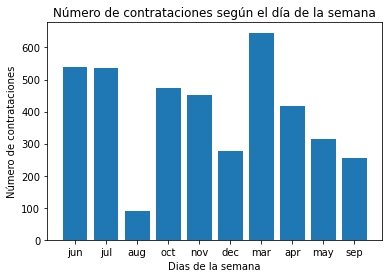

In [1251]:
display(dataTr.groupby('mes')['target'].count())
plt.bar(dataTr.mes.unique(),data_train.groupby('mes')['target'].sum())
plt.xlabel('Dias de la semana')
plt.ylabel('Número de contrataciones')
plt.title('Número de contrataciones según el día de la semana')

En cambio, como podemos ver con el porcentaje de correlación entre el més y la columna target, existe una correlacion más alta y esto queda reflejado en el número de contrataciones por mes, como se puede ver en el gráfico.

## 3. Transformar, al menos, las variables estado y resultado_anterior utilizando one-hot encoding

In [1252]:
#Obtenemos las columnas con variables categoricas y transformamos todas las categóricas utilizando el onehotenconding
#Obtenemos las columnas con variables numéricas y las normalizamos.
categorical_columns_train=dataTr.loc[:, dataTr.columns!='target'].select_dtypes(exclude=["int64","float64"]).columns 
categorical_columns_test=dataTe.loc[:, dataTe.columns!='target'].select_dtypes(exclude=["int64","float64"]).columns 
numerical_columns_train=dataTr.loc[:, dataTr.columns!='target'].select_dtypes(include=["int64","float64"]).columns 
numerical_columns_test=dataTe.loc[:, dataTr.columns!='target'].select_dtypes(include=["int64","float64"]).columns
print('Variables categóricas:')
display(categorical_columns_train)
display(categorical_columns_test)
print('Variables numéricas:')
display(numerical_columns_train)
display(numerical_columns_test)


Variables categóricas:


Index(['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo',
       'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior'],
      dtype='object')

Index(['empleo', 'estado', 'educacion', 'impago', 'hipoteca', 'prestamo',
       'tipo_contacto', 'mes', 'dia_semana', 'resultado_anterior'],
      dtype='object')

Variables numéricas:


Index(['edad', 'contactos_actual', 'contactos_anterior', 'tasa_var_empleo_3m',
       'euribor_3m', 'ipc_1m'],
      dtype='object')

Index(['edad', 'contactos_actual', 'contactos_anterior', 'tasa_var_empleo_3m',
       'euribor_3m', 'ipc_1m'],
      dtype='object')

In [1253]:
data_train=dataTr.copy()
data_test=dataTe.copy()
# Creación del encoder
onehotencoder = preprocessing.OneHotEncoder()
onehotencoder.fit(dataTr[categorical_columns_train])
# Transformamos los datos, los unimos al dataframe de los datos y eliminamos la columna de las variables categóricas
one_train = onehotencoder.transform(dataTr[categorical_columns_train]).toarray()
onehot_datatrain = pd.DataFrame(one_train, columns = onehotencoder.get_feature_names())
data_train.drop(categorical_columns_train,axis=1, inplace=True)
data_train=data_train.join(onehot_datatrain)

# Transformamos los datos, los unimos al dataframe de los datos y eliminamos la columna de las variables categóricas
one_test = onehotencoder.transform(dataTe[categorical_columns_test]).toarray()
onehot_datatest = pd.DataFrame(one_test, columns = onehotencoder.get_feature_names())
data_test.drop(categorical_columns_test,axis=1, inplace=True)
data_test=data_test.join(onehot_datatest)

display(data_train)
display(data_test)



,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target,x0_admin.,x0_blue-collar,x0_entrepreneur,...,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,26,3,0,1.4,4.865,94.465,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,42,9,0,1.4,4.865,94.465,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,30,2,0,1.4,4.865,94.465,no,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,55,3,0,1.4,4.865,94.465,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41,2,0,1.4,4.865,94.465,no,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32647,73,1,0,-1.1,1.028,94.767,yes,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32648,46,1,0,-1.1,1.028,94.767,no,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32649,56,2,0,-1.1,1.028,94.767,no,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32650,44,1,0,-1.1,1.028,94.767,yes,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m,target,x0_admin.,x0_blue-collar,x0_entrepreneur,...,x7_oct,x7_sep,x8_fri,x8_mon,x8_thu,x8_tue,x8_wed,x9_failure,x9_nonexistent,x9_success
0,56,1,0,1.1,4.857,93.994,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,1,0,1.1,4.857,93.994,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,1,0,1.1,4.857,93.994,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,1,0,1.1,4.857,93.994,no,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,1,0,1.1,4.857,93.994,no,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8531,56,3,1,-1.7,0.886,94.027,yes,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8532,58,1,0,-1.7,0.886,94.027,no,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8533,34,2,0,-1.7,0.886,94.027,no,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8534,44,1,0,-1.7,0.886,94.027,no,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [1254]:
# Instanciamos la clase
minmax = preprocessing.StandardScaler()

# Transformamos los datos
minmax.fit(data_train[numerical_columns_train])

minmax_train=minmax.transform(data_train[numerical_columns_train])
minmax_datatrain = pd.DataFrame(minmax_train, columns = numerical_columns_train)
data_train.drop(numerical_columns_train,axis=1, inplace=True)
data_train=data_train.join(minmax_datatrain)


minmax_test=minmax.transform(data_test[numerical_columns_test])
minmax_datatest = pd.DataFrame(minmax_test, columns = numerical_columns_test)
data_test.drop(numerical_columns_test,axis=1, inplace=True)
data_test=data_test.join(minmax_datatest)

display(data_train)
display(data_test)



,target,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,...,x8_wed,x9_failure,x9_nonexistent,x9_success,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m
0,no,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-1.315135,0.143479,-0.385848,0.915139,0.823313,1.665649
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.195420,2.271517,-0.385848,0.915139,0.823313,1.665649
2,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.937496,-0.211194,-0.385848,0.915139,0.823313,1.665649
3,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.422747,0.143479,-0.385848,0.915139,0.823313,1.665649
4,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.101011,-0.211194,-0.385848,0.915139,0.823313,1.665649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32647,yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,3.122122,-0.565867,-0.385848,-0.592020,-1.323396,2.167938
32648,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.573059,-0.565867,-0.385848,-0.592020,-1.323396,2.167938
32649,no,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.517156,-0.211194,-0.385848,-0.592020,-1.323396,2.167938
32650,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.384240,-0.565867,-0.385848,-0.592020,-1.323396,2.167938


,target,x0_admin.,x0_blue-collar,x0_entrepreneur,x0_housemaid,x0_management,x0_retired,x0_self-employed,x0_services,x0_student,...,x8_wed,x9_failure,x9_nonexistent,x9_success,edad,contactos_actual,contactos_anterior,tasa_var_empleo_3m,euribor_3m,ipc_1m
0,no,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.517156,-0.565867,-0.385848,0.734280,0.818837,0.882277
1,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.611566,-0.565867,-0.385848,0.734280,0.818837,0.882277
2,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,-0.276628,-0.565867,-0.385848,0.734280,0.818837,0.882277
3,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.006601,-0.565867,-0.385848,0.734280,0.818837,0.882277
4,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.517156,-0.565867,-0.385848,0.734280,0.818837,0.882277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8531,yes,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.517156,0.143479,1.610462,-0.953738,-1.402841,0.937163
8532,no,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.705976,-0.565867,-0.385848,-0.953738,-1.402841,0.937163
8533,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,-0.559857,-0.211194,-0.385848,-0.953738,-1.402841,0.937163
8534,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.384240,-0.565867,-0.385848,-0.953738,-1.402841,0.937163


## 4. Representar gráficamente la curva ROC del modelo y calcular su AUC en el conjunto de validación

In [1255]:
#Transformamos los datos de target en variables categoricas mediante el label encoder para facilitar su uso
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(data_train['target'])
data_train['target']=label_encoder.transform(dataTr['target'])
data_test['target']=label_encoder.transform(dataTe['target'])

In [1256]:
data_train['target']

0        0
1        0
2        0
3        0
4        0
        ..
32647    1
32648    0
32649    0
32650    1
32651    0
Name: target, Length: 32652, dtype: int64

In [1257]:
#Como ya tenemos los datos separados en 2 datasets de training y de test no es necesario utilizar el 'train_test_split'
x_train=data_train.drop(["target"],axis=1)
y_train=data_train['target']
x_test=data_test.drop(["target"],axis=1)
y_test=data_test['target']


In [1258]:
#Creación del modelo  por defecto
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

print('La precision del modelo es : ',knn.score(x_test, y_test))

La precision del modelo es :  0.9389643861293346


In [1259]:
preds_train = knn.predict_proba(x_train)
preds_test = knn.predict_proba(x_test)
display(preds_train)
display(preds_test)

array([[0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6]])

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [0.6, 0.4],
       [0.2, 0.8]])

/Users/roig/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


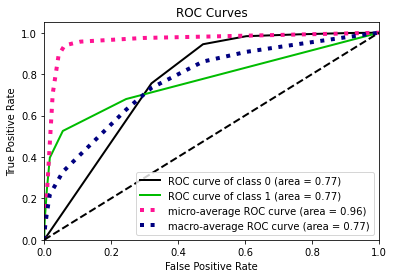

In [1260]:
#Creación de la curva roc mediante el uso de una libreria
skplt.metrics.plot_roc_curve(y_test, knn.predict_proba(x_test))
plt.show()

Accuracy 0.9389643861293346


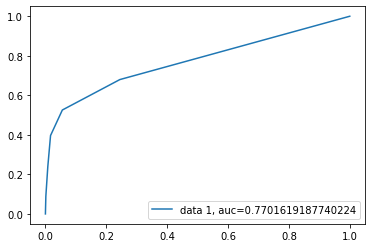

In [1261]:
#Creación de la curva roc mediante el uso de métricas
y_pred = knn.predict(x_test)
print("Accuracy", metrics.accuracy_score(y_test, y_pred))
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 5. Maximizar el balance

In [1262]:
#Creación de dataframe con las probabilidades de que contraten y de que no contraten
#La columna con el titulo 'Target 0 ' hace referencia a la columna que guarda las probabilidades de que no contraten y la columna que tiene el título 'Target 1' guarda las probabilidades de que contraten
df = pd.DataFrame(knn.predict_proba(x_test), columns = ['Target 0','Target 1'])
df


,Target 0,Target 1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.8,0.2
4,1.0,0.0
...,...,...
8531,0.2,0.8
8532,0.4,0.6
8533,1.0,0.0
8534,0.6,0.4


In [1263]:
#Funcion que varia el umbral de probabilidad, encuentra el umbral que maximiza el número de contrataciones y crea un gráfico con estos datos.
def umbralProba():
    #Se pone el 1.1 como tope dado que esta funcion no incluye el tope 
    umbral=list(np.arange(0, 1.1, 0.1))
    porcentaje_arr = []
    porcentaje_arr = list()
    for i in umbral:
        indices=df.index[df['Target 1'] >= i].tolist()
        clientes_total=y_test.iloc[indices]
        porcentaje=(clientes_total.sum()/ len(clientes_total)) * 100
        porcentaje_arr.append(porcentaje)
    
    
    zmax = np.max(porcentaje_arr)
    
    posicion=np.where(max(porcentaje_arr) == porcentaje_arr)
    posicion=np.asarray(posicion)
    

    print('El umbral con mayor número de contrataciones es: ')
    for i in posicion[0]:
        print(umbral[i])
    print("El mayor porcentaje de contratación es: "+str(zmax)+'%')
    plt.figure(figsize=(30,9))
    plt.plot(umbral, porcentaje_arr,color='red')
    plt.title('Contrataciones en función del umbral')
    plt.xticks(umbral)
    plt.xlabel('Umbral')
    plt.ylabel('Contrataciones')
    plt.show()
    return umbral[posicion[0][0]]
    

El umbral con mayor número de contrataciones es: 
0.9
1.0
El mayor porcentaje de contratación es: 83.82352941176471%


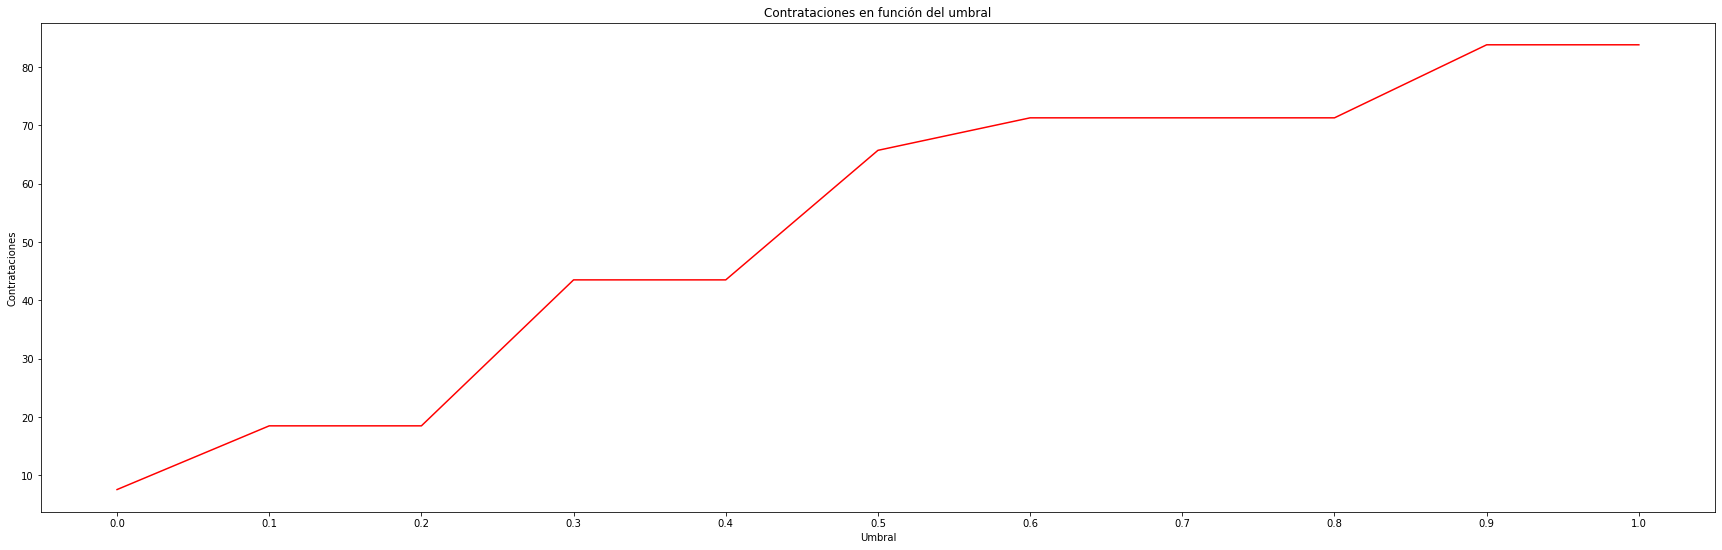

In [1264]:
bestumbral_array=umbralProba()

Como solo se obtienen gastos en el caso de que no se contraten, para maximizar el balance bastará con buscar el maximo número de contrataciones en funcion del numero de clientes.

Como se puede comprobar en la gráfica y dado que tiene sentido que a una mayor probabilidad de contratación segun lo que indica el modelo mayor será el numero de contrataciones , escogemos la probabilidad máxima que es 1 dado que esta junto con la probabilidad de 0.9 son las que tienen un mayor porcentaje de contratación.

In [1265]:
#Obtención de los datos que superan el umbral de probabilidad
#para ello cogemos los indices de las filas que superan dicho umbral y buscamos los indices de estos datos en el dataset de datos
indices=df.index[df['Target 1'] >= bestumbral_array].tolist()
clientes_total=y_test.iloc[indices]
clientes_total

7766    0
7774    1
7779    1
7829    1
7832    1
       ..
8448    1
8467    1
8473    1
8478    1
8482    1
Name: target, Length: 68, dtype: int64

In [1266]:
#El número de contrataciones coincide con la suma de los elementos de dicha fila dado que el 0 indica que no se han contratado los servicios y el 1 indica que si que se han contratado.
contrataciones=clientes_total.sum()
Balance=100*contrataciones-1+len(clientes_total)
print('El balance con el umbral que lo maximiza es :'+ str(Balance)+ '€')   

El balance con el umbral que lo maximiza es :5767€


# Referencias
* Apuntes de clase
* Ejercicios de clase
* Apuntes de la carrera
* Ejercicios de la carrera
* Librería de sklearn:
https://scikit-learn.org/stable/
* Librería de pandas:
https://pandas.pydata.org/docs/
* Librería de matplotlib:
https://matplotlib.org/stable/gallery/index.html